# Moore's Law and MNIST

Anna Pauxberger, CS156

23 September 2018

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Moore's Law

Does Moore's Law hold up?

In [8]:
# import data
df = pd.read_csv('specdata20120207/benchmarks.csv', sep=',',low_memory=False)

In [9]:
# parse date as string
# Oren helped me narrow down 5 lines of code to this one line
df['pddt'] = df['testID'].str.partition('-')[2].str.partition('-')[0]
df.head()

,testID,benchName,base,peak,pddt
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,19990104
1,cpu95-19990104-03254,102.swim,27.20,34.8,19990104
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,19990104
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,19990104
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,19990104


In [10]:
# add delta between days
df['datetime'] = pd.to_datetime(df['pddt'])
df['delta'] = pd.to_timedelta(df['datetime'])
df['delta_days'] = df['delta'].dt.days - min(df['delta'].dt.days)
df.head()

,testID,benchName,base,peak,pddt,datetime,delta,delta_days
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,19990104,1999-01-04,10595 days,1069.0
1,cpu95-19990104-03254,102.swim,27.20,34.8,19990104,1999-01-04,10595 days,1069.0
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,19990104,1999-01-04,10595 days,1069.0
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,19990104,1999-01-04,10595 days,1069.0
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,19990104,1999-01-04,10595 days,1069.0


In [11]:
# extract benchmark name with regex

import re

def get_benchmark (row):
    benchName = str(row['benchName'])
    searchObj = " ".join(re.findall("[a-zA-Z]+", benchName))
    return searchObj

df['benchmark'] = df.apply (lambda row: get_benchmark (row), axis=1)
df.head()

,testID,benchName,base,peak,pddt,datetime,delta,delta_days,benchmark
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,19990104,1999-01-04,10595 days,1069.0,tomcatv
1,cpu95-19990104-03254,102.swim,27.20,34.8,19990104,1999-01-04,10595 days,1069.0,swim
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,19990104,1999-01-04,10595 days,1069.0,su cor
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,19990104,1999-01-04,10595 days,1069.0,hydro d
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,19990104,1999-01-04,10595 days,1069.0,mgrid


In [12]:
# view and choose benchmarks

df['benchmark'].value_counts()
benchmark_list = ['gcc','bzip','perlbench','libquantum']
benchmark_list

['gcc', 'bzip', 'perlbench', 'libquantum']

In [13]:
# create new data frames for each benchmark and normalize to smallest value

gcc = df[df.benchmark == 'gcc']
gcc = gcc[['delta_days','base']]
gcc['normalized_days'] = gcc['delta_days'] - min(gcc['delta_days'])

bzip = df[df.benchmark == 'bzip']
bzip = bzip[['delta_days','base']]
bzip['normalized_days'] = bzip['delta_days'] - min(bzip['delta_days'])

perlbench = df[df.benchmark == 'perlbench']
perlbench = perlbench[['delta_days','base']]
perlbench['normalized_days'] = perlbench['delta_days'] - min(perlbench['delta_days'])

libquantum = df[df.benchmark == 'libquantum']
libquantum = libquantum[['delta_days','base']]
libquantum['normalized_days'] = libquantum['delta_days'] - min(libquantum['delta_days'])
libquantum.head()

,delta_days,base,normalized_days
45835,3755.0,1.0,0.0
45864,3755.0,14.4,0.0
45876,3755.0,13.5,0.0
45905,3755.0,11.5,0.0
45951,3755.0,17.3,0.0


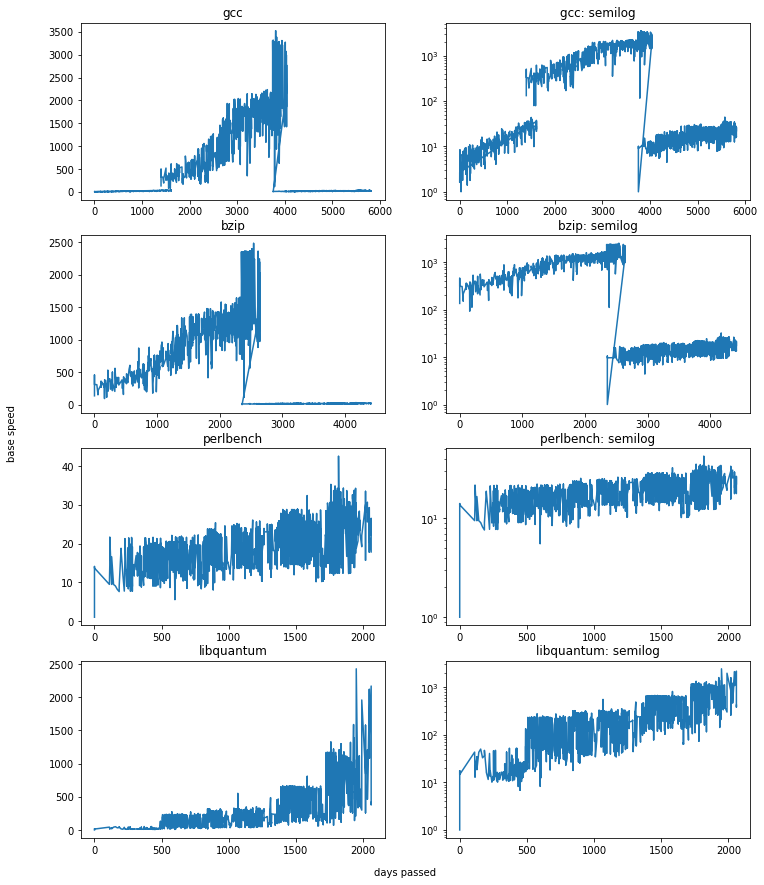

In [24]:
fig = plt.figure(figsize=(12,15))
fig.text(0.5, 0.09, 'days passed', ha='center')
fig.text(0.04, 0.5, 'base speed', va='center', rotation='vertical')

# gcc
plt.subplot(421)
plt.plot(gcc['normalized_days'], gcc['base'])
plt.title("gcc")

plt.subplot(422)
plt.semilogy(gcc['normalized_days'], gcc['base'])
plt.title("gcc: semilog")

# bzip
plt.subplot(423)
plt.plot(bzip['normalized_days'], bzip['base'])
plt.title("bzip")

plt.subplot(424)
plt.semilogy(bzip['normalized_days'], bzip['base'])
plt.title("bzip: semilog")

# perlbench
plt.subplot(425)
plt.plot(perlbench['normalized_days'], perlbench['base'])
plt.title("perlbench")

plt.subplot(426)
plt.semilogy(perlbench['normalized_days'], perlbench['base'])
plt.title("perlbench: semilog")

# libquantum
plt.subplot(427)
plt.plot(libquantum['normalized_days'], libquantum['base'])
plt.title("libquantum")

plt.subplot(428)
plt.semilogy(libquantum['normalized_days'], libquantum['base'])
plt.title("libquantum: semilog")

plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

In [84]:
x = [i for i in libquantum['normalized_days']]
y = [math.log(i,2) for i in libquantum['base']]

y = np.array(y).reshape(-1,1)
x = np.array(x).reshape(-1,1)

reg = LinearRegression().fit(x,y)

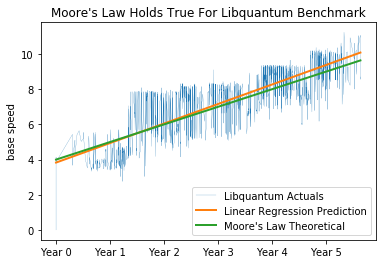

In [97]:
x = [i for i in libquantum['normalized_days']]
y = [math.log(i,2) for i in libquantum['base']]
y_reg = [reg.predict(i) for i in x]
y_reg = np.array(y_reg).reshape(-1,1)
y_moore = [4+i/365 for i in x]

plt.plot(x,y, linewidth=0.2, label="Libquantum Actuals")
plt.plot(x,y_reg, linewidth = 2, label="Linear Regression Prediction")
plt.plot(x,y_moore, linewidth=2, label="Moore's Law Theoretical")
plt.legend()
plt.ylabel("base speed")
plt.title("Moore's Law Holds True For Libquantum Benchmark")

x = [i for i in range(int(max(libquantum['normalized_days'])))]
x_ticks = [day for day in x if day%365 == 0] 
x_labels = ['Year ' + str(i) for i in range(len(x_ticks))]
plt.xticks(x_ticks, x_labels)

plt.show()

### Does Moore's Law hold up?

According to Moore's law, computational speed doubles every year. This is most visible for the libquantum benchmark, as visible in the last plot. My conclusion is that Moore's law does not hold up for all benchmarks (perlbench), but does hold up for some of them (libquantum). 


### Limitations

Especially the first plots for the gcc benchmark made me worried about the accuracy of my calculations. Instead of increasing only, the performance of the benchmark decreases after around 4 years, which might mean that another version of gcc was introduced that initially performed worse. 

# MNIST Digits

In [1]:
# MNIST DIGITS
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
# image matrix representation and target (y) value of the digit
digits.images[0], digits.target[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)

<Figure size 432x288 with 0 Axes>

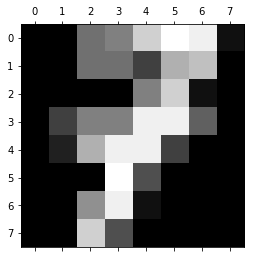

<Figure size 432x288 with 0 Axes>

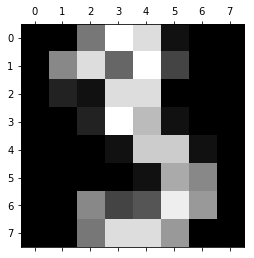

In [66]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.gray() 
plt.matshow(digits.images[7]) 
plt.show() 

plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

In [90]:
# reshape data.images 

data = digits

x = [data.images[i] for i in range(len(data.images)) if data.target[i] in {0,1} ]
x = np.array(x)
x = x.reshape((360, -1))

y = [data.target[i] for i in range(len(data.target)) if data.target[i] in {0,1} ]
y = np.array(y)

x.shape, y.shape

((360, 64), (360,))

In [16]:
model = KNeighborsClassifier(n_neighbors=4)

In [17]:
scores = cross_val_score(model, x, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [50]:
# find optimal n

k = [i for i in range(2,21)]
accuracy = []
stdev = []

for i in k:
    model = KNeighborsClassifier(n_neighbors=4)
    scores = cross_val_score(model, x, y, cv=i)
    accuracy.append(scores.mean())
    stdev.append(scores.std())
    
optimal_k = pd.DataFrame(data=[k,accuracy,stdev])

optimal_k.T
optimal_k.rename({0:'k', 1:'accuracy', 2:'stdev'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
k,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
accuracy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
stdev,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Optional: the real deal
Using the entire dataset

In [52]:
from sklearn import datasets
digits = datasets.load_digits()

In [53]:
from sklearn.datasets import fetch_mldata
custom_data_home = "~/scikit_learn_data/"
mnist = fetch_mldata("MNIST original", data_home=custom_data_home)

In [64]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

mnist.data.shape, mnist.target.shape
# np.unique(mnist.target)

((70000, 784), (70000,))

In [85]:
X = [mnist.data[i] for i in range(len(mnist.data)) if mnist.target[i] in {0,1} ]
X = np.array(X)

Y = [mnist.target[i] for i in range(len(mnist.data)) if mnist.target[i] in {0,1} ]
Y = np.array(Y)

X.shape, Y.shape

(14780, 784)

In [93]:
scores = cross_val_score(model, X, Y, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [95]:
k = [i for i in range(2,6)]
accuracy = []
stdev = []

for i in k:
    model = KNeighborsClassifier(n_neighbors=4)
    scores = cross_val_score(model, X, Y, cv=i)
    accuracy.append(scores.mean())
    stdev.append(scores.std())
    
optimal_k = pd.DataFrame(data=[k,accuracy,stdev])

optimal_k.T
optimal_k.rename({0:'k', 1:'accuracy', 2:'stdev'})

,0,1,2,3
k,2.000000,3.000000,4.000000,5.000000
accuracy,0.999323,0.999323,0.999526,0.999594
stdev,0.000271,0.000253,0.000400,0.000395


### Limitations

The data itself is quite reliable, as it has proven itself in the academic setting multiple times. The model, however, has strong limitations as it has only been trained to recognize 0 and 1. 0 and 1 are very distinct numbers, which explains the strong performance (100% accuracy), but makes it more vulnurable to being overfitted to these exact numbers. If there was a '7' in the dataset, it will most likely be classified as a 1. If the model had been trained on all numbers, it would be (more) able to distinguish between a 1 and a 7. 


Testing the model on the original dataset has outstanding performance as well (99% accuracy) and performance increases marginally as k increases. If it were dramatically important to predict 0 and 1 correctly, it would be worth spending more computing power on testing more k's and choosing the optimal k which might be higher. 